In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import statsmodels.api as sm

import matplotlib.pyplot as plt

# Importing Data

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/NUS-BACT/datasets/master/hdb-resale-flat-prices.csv")

df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


# EDA

## Distribution of Town

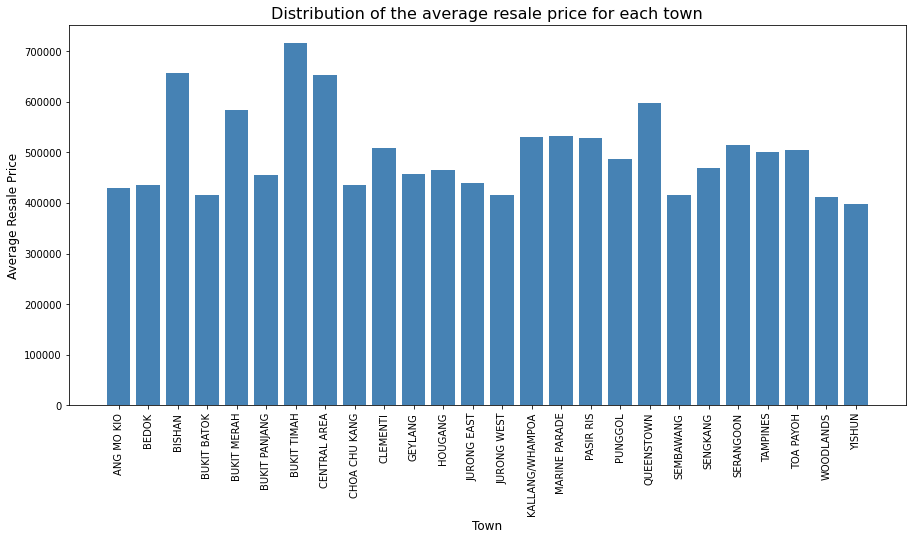

In [ ]:
town_labels = sorted(df["town"].unique().tolist())
town_count = []
town_price = []

for town in town_labels:
  cond = (df["town"] == town)
  town_count.append(len(df[cond]))
  town_price.append(sum(df[cond]['resale_price']) / df[cond].shape[0])

plt.figure(figsize = (15, 7))
plt.xticks(rotation = 90)
plt.bar(town_labels, town_price, color = "steelblue")
plt.title("Distribution of the average resale price for each town", fontsize = 16) 
plt.xlabel("Town", fontsize = 12)
plt.ylabel("Average Resale Price", fontsize = 12)
plt.show()

## Distribution of Flat Types

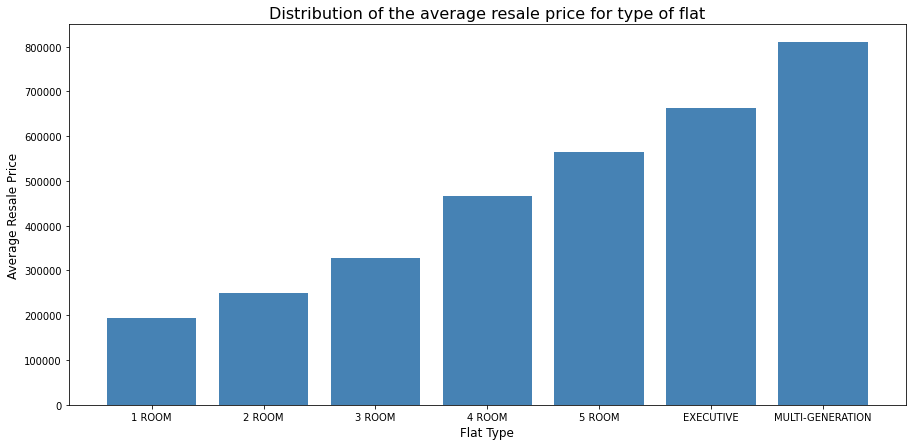

In [ ]:
flat_type_labels = sorted(df["flat_type"].unique().tolist())
flat_type_count = []
flat_type_price = []

for type in flat_type_labels:
  cond = (df["flat_type"] == type)
  flat_type_count.append(len(df[cond]))
  flat_type_price.append(sum(df[cond]['resale_price']) / df[cond].shape[0])

plt.figure(figsize = (15, 7))
plt.bar(flat_type_labels, flat_type_price, color = "steelblue")
plt.title("Distribution of the average resale price for type of flat", fontsize = 16) 
plt.xlabel("Flat Type", fontsize = 12)
plt.ylabel("Average Resale Price", fontsize = 12)
plt.show()

## Remaining Lease vs Price of Resale Flat

In [ ]:
df['remaining_lease_years'] = df['remaining_lease'].str.slice(0,2).astype('float')
df['remaining_lease_months']= df['remaining_lease'].str.slice(9,11)

for x in range(df.shape[0]):
    i = df.loc[x, 'remaining_lease_months']
    try:
        df['remaining_lease_months'] = float(i)
    except:
        df['remaining_lease_months'] = float(0)

df['remaining_lease_total'] = df['remaining_lease_years'] + (df['remaining_lease_months'] / 12)

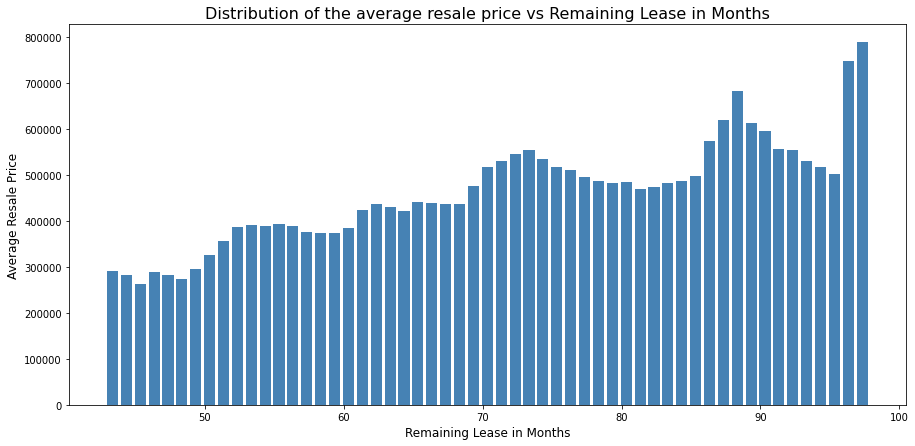

In [ ]:
remaining_lease_labels = sorted(df["remaining_lease_total"].unique().tolist())
remaining_lease_price = []

for month in remaining_lease_labels:
  cond = (df["remaining_lease_total"] == month)
  remaining_lease_price.append(sum(df[cond]['resale_price']) / df[cond].shape[0])

plt.figure(figsize = (15, 7))
plt.bar(remaining_lease_labels, remaining_lease_price, color = "steelblue")
plt.title("Distribution of the average resale price vs Remaining Lease in Months", fontsize = 16) 
plt.xlabel("Remaining Lease in Months", fontsize = 12)
plt.ylabel("Average Resale Price", fontsize = 12)
plt.show()

## Distribution of Flat Model

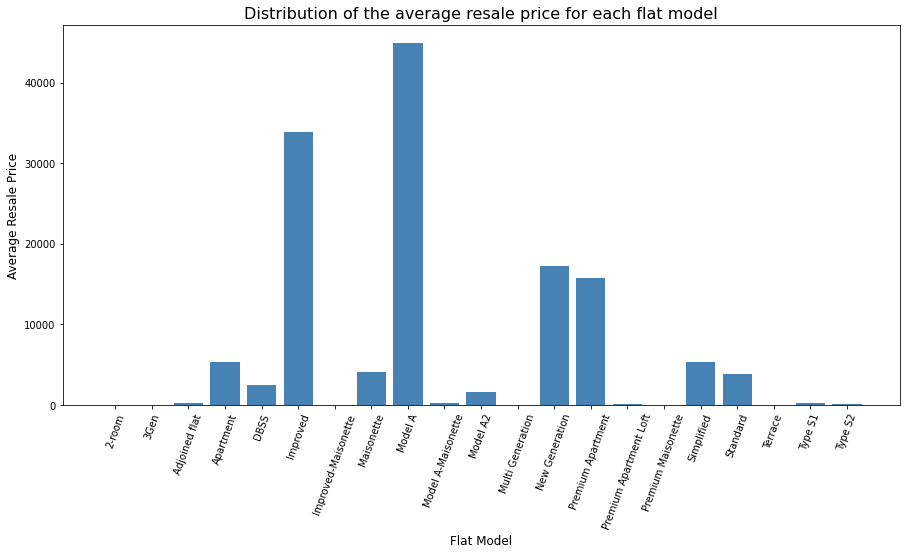

In [ ]:
flat_model_labels = sorted(df["flat_model"].unique().tolist())
flat_model_count = []

for model in flat_model_labels:
  cond = (df["flat_model"] == model)
  flat_model_count.append(len(df[cond]))
  flat_type_price.append(sum(df[cond]['resale_price']) / df[cond].shape[0])

plt.figure(figsize = (15, 7))
plt.xticks(rotation = 70)
plt.bar(flat_model_labels, flat_model_count, color = "steelblue")
plt.title("Distribution of the average resale price for each flat model", fontsize = 16) 
plt.xlabel("Flat Model", fontsize = 12)
plt.ylabel("Average Resale Price", fontsize = 12)
plt.show()

# Methodology

### Data Preprocessing

In [ ]:
# Converting categorical variables to numerical variables

monthdict = {}

for i, month in enumerate(df.month.unique()):
    monthdict[month] = i

for row in range(len(df)):
    value = df.loc[row, 'month']

    for key in monthdict.keys():
        if value == key:
            df.loc[row, 'month'] = monthdict[key]

In [ ]:
towndict = {}

for i, town in enumerate(df.town.unique()):
    towndict[town] = i

for row in range(len(df)):
    value = df.loc[row, 'town']

    for key in towndict.keys():
        if value == key:
            df.loc[row, 'town'] = towndict[key]

In [ ]:
flat_type_dict = {}

for i, flat_type in enumerate(df.flat_type.unique()):
    flat_type_dict[flat_type] = i

for row in range(len(df)):
    value = df.loc[row, 'flat_type']

    for key in flat_type_dict.keys():
        if value == key:
            df.loc[row, 'flat_type'] = flat_type_dict[key]

In [ ]:
storeydict = {}

df = df.sort_values('storey_range', ascending = True)

for i, storey in enumerate(df.storey_range.unique()):
    storeydict[storey] = i

for row in range(len(df)):
    value = df.loc[row, 'storey_range']

    for key in storeydict.keys():
        if value == key:
            df.loc[row, 'storey_range'] = storeydict[key]

In [ ]:
flatmodeldict = {}

for i, flat_model in enumerate(df.flat_model.unique()):
    flatmodeldict[flat_model] = i

for row in range(len(df)):
    value = df.loc[row, 'flat_model']

    for key in flatmodeldict.keys():
        if value == key:
            df.loc[row, 'flat_model'] = flatmodeldict[key]

In [ ]:
# Dropping irrelevant columns
df.drop(columns = ['remaining_lease_years', 'remaining_lease_months', 'street_name', 'block'], inplace = True)

KeyError: ignored

In [ ]:
# One-hot encoding or getting dummies
df = pd.get_dummies(df, columns = ['month', 'town', 'flat_type', 'storey_range', 'flat_model'], drop_first = True) # drop_first to prevent multicolinearity 


## Train-Test Split

In [ ]:
X = df.drop(columns = 'resale_price')
y = df['resale_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    random_state = 42)

## Model Training

In [ ]:
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

## Cross Validation

In [ ]:
def get_CV_results(model, X, y, cv=10):
    scores = cross_validate(model, X, y, cv=cv, return_train_score=True)
    print(f"Mean Test Score: {scores['test_score'].mean()}")
    print("\n")

    display(pd.DataFrame(scores)) 

In [ ]:
get_CV_results(lr, X_train, y_train)

Mean Test Score: 0.8773002564978138




,fit_time,score_time,test_score,train_score
0,1.737279,0.009823,0.879149,0.877502
1,1.811095,0.009970,0.875185,0.877952
2,1.753141,0.009805,0.875310,0.877940
3,1.801023,0.009761,0.880289,0.877386
4,1.808269,0.010763,0.877235,0.877733
5,1.814395,0.009751,0.877414,0.877700
6,1.771307,0.010314,0.873886,0.878078
7,1.732010,0.009704,0.877313,0.877720
8,1.708934,0.009582,0.880112,0.877413
9,1.712744,0.009967,0.877109,0.877748


## Test Set Results

In [ ]:
def get_results(model, X, y):
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)

    print(f"R2: {r2}")
    print(f"RMSE: {mse**0.5}")

In [ ]:
get_results(lr, X_test, y_test)

R2: 0.8779692368634991
RMSE: 56617.5011023135


In [ ]:
RMSE = 56617.5011023135
mean = df['resale_price'].mean()
normalised_RMSE = RMSE/mean
normalised_RMSE

0.04430164405501839

## Model Interpretation

In [ ]:
ols = sm.OLS(y_train, sm.add_constant(X_train))

ols_res = ols.fit()

print(ols_res.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:           resale_price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     5633.
Date:                Wed, 28 Sep 2022   Prob (F-statistic):               0.00
Time:                        09:35:39   Log-Likelihood:            -1.3420e+06
No. Observations:              108454   AIC:                         2.684e+06
Df Residuals:                  108315   BIC:                         2.686e+06
Df Model:                         138                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
floor_area_sqm          3760